# Mathematik für Biologiestudierende

Wintersemester 2024/25

08.01.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

## Normalapproximation

* $X$ sei $B(n,p)$-verteilt
* Es gilt näherungsweise für natürliche Zahlen $a < b$

$$     P(a \le X \le b) 
      \cong \Phi\!\left( \frac{b - n \cdot p}{\sqrt{n \cdot p
            \cdot (1-p)}} \right) - \Phi\!\left( \frac{a - n
          \cdot p}{\sqrt{n \cdot p \cdot (1-p)}} \right)  $$

* Wenn $a = 0$ oder $b = n$ ist, braucht man nur einen Term

\begin{align*}
      P(a \le X)
      &\cong 1 - \Phi\!\left( \frac{a - n \cdot p}{\sqrt{n \cdot
            p \cdot (1-p)}} \right) \\
      P(X \le b) 
      &\cong \Phi\!\left( \frac{b - n \cdot p}{\sqrt{n \cdot p
            \cdot (1-p)}} \right) 
\end{align*}  

# Normalapproximation zur Versuchsplanung

## Extinktionsexperiment

* Ein Extinktionsexperiment wird geplant, bei dem die Versuchstiere eine einmal erlernte Aufgabe wieder verlernen   sollen.  Dazu sollen zuerst mindestens 50 Tiere diese Handlung erlernen.  Aus früheren Versuchen weiß man, dass dies nur bei 80% der Versuchstiere gelingt. 
* Wenn man also zu Beginn der Verlernphase 50 Tiere haben will, welche die Aufgabe gelernt haben, dann muss man deutlich mehr als diese 50 Tiere trainieren.
* Wir wollen zu 90% sicher sein, dass mindestens 50 Tiere die Aufgabe gelernt haben

### Normalapproximation

* $X$ ist die Anzahl der Tiere, welche die Aufgabe gelernt haben
* $X$ ist $B_{n,p}$-verteilt für $p=0.8$ und *unbekanntes* n
* Ziel
$$ P(50 \le X) \ge 0.9  $$

$$ P(50 \le X) \cong 1 - \Phi\left( \frac{50 - 0.8 \cdot n}{\sqrt{n \cdot 0.8 \cdot 0.2}} \right) 
\overset{!}{=} 0.9
$$

Das bedeutet
$$  \Phi\left( \frac{50 - 0.8 \cdot n}{\sqrt{0.16 \cdot n}} \right) = 0.1
$$

* Wir benötigen das $u$ mit $\Phi(u) = 0.1$.  
* Das ist das Quantil $q_{0.1}$

In [47]:
import numpy as np
np.set_printoptions(legacy='1.21')
from scipy import stats
Phi = stats.norm()
Phi.ppf(0.1)

-1.2815515655446004

* neue Gleichung
$$ \frac{50 - 0.8 \cdot n}{\sqrt{0.16 \cdot n}} = -1.28155  $$ 

Nenner hochmultiplizieren

In [48]:
-1.28155 * np.sqrt(0.16)

-0.51262

$$ 50 - 0.8n = -0.51262 \sqrt n  $$

Trick:  Wir nennen $\sqrt n$ mal kurz $x$ und bringen alles auf die linke Seite.  Dann können wir mit der p-q-Formel weitermachen


$$  50 - 0.8 x^2 + 0.51262 x = 0 $$ 

In [49]:
50 / 0.8

62.5

In [50]:
0.51262 / 0.8

0.6407749999999999

$$ x^2 - 0.640775x - 62.5 = 0    $$

$$ x = \frac{0.640775}2 \pm \sqrt{\frac{0.640775^2}4 + 62.5} $$

Die negative Lösung ist unsinnig

In [51]:
x = 0.640775 / 2 + np.sqrt(0.640775**2/4 + 62.5)
x

8.232571026066383

In [52]:
n = x**2
n

67.77522569922769

Also 68 Tiere.

Das ist dasselbe Ergebnis, das wir in Lektion 6 mit zwei anderen Methoden herausbekommen hatten.

# t-Test für Erwartungswerte

## Verbundene und unverbundene Stichproben

* Zwei Versuchsreihen liefern Messergebnisse.  Der Test soll entscheiden, ob sich diese Ergebnisse signifikant unterscheiden.

* *Unverbundene Stichproben:* Die Messerergebnisse werden an verschiedenen Populationen gewonnen.

  Beispiel: 9 Maisfelder werden mit einem Bodenbakterium behandelt, 10 weitere bleiben unbehandelt.  Bei allen wird der Befall mit Maiszünsler bestimmt.

* *Verbundene Stichproben:* Beide Messungen werden an derselben Population durchgeführt.

  Beispiel: Bei 10 Patienten mit Bluthochdruck wird der Blutdruck vor und nach einer Therapie bestimmt.

## Teststatistik für verbundene Stichproben

* Ein Versuch wird $n$-mal durchgeführt
* Ein Parameter wird geändert 
* Der Versuch wird mit dem geänderten Parameter mit *demselben* Kollektiv wiederholt
* Die Messergebnisse werden verglichen 

# t-Test zum Vergleich zweier Erwartungswerte bei verbundenen Stichproben

* Gegeben sind Zufallsvariable $X_1, \dots, X_n$ und $Y_1, \dots, Y_n$
* Verteilungsvoraussetzungen:
  * Alle $X_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_1$ und unbekannter Varianz $\sigma^2$
  * Alle $Y_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_2$ und unbekannter Varianz $\sigma^2$
  * Die beiden Varianzen müssen also gleich sein
* Ziel: $\mu_1$ und $\mu_2$ sollen verglichen werden

* $x_j$ und $ y_j$ seien Realisierungen (d.h. die Daten)
* $z_j = x_j - y_j$ seien die Differenzen
* Bestimme arithmetischen Mittelwert
$$      \overline z = \frac1n \sum_{j=1}^n z_j   $$
* und Stichprobenstreuung
$$      s = \sqrt{ \frac1{n-1} \sum_{j=1}^n (z_j - \overline z)^2 } $$

* Die *Teststatistik* ist
$$        t = \frac{\overline z}s \cdot \sqrt{n}  $$
* Die Teststatistik wird mit einem Quantil der $t$-Verteilung verglichen 

# Die t-Verteilung

* Wenn kein Unterschied zwischen $X_j$ und $Y_j$ besteht, dann ist die Teststatistik für große $n$ annähernd standardnormalverteilt
* Die tatsächliche Verteilung der Teststatistik ist die $t$-Verteilung mit $(n-1)$ Freiheitsgraden
* Die $t$-Verteilung mit $f$ Freiheitsgraden ist in scipy implementiert als <code>stats.t(f)</code>

In [53]:
from scipy import stats

In [54]:
P = stats.t(30)

Die Verteilungsfunktion heißt wie immer <code>cdf</code>

In [55]:
P.cdf(0)

0.5

Das Quantil heißt <code>ppf</code>

In [56]:
P.ppf(0.95)

1.6972608865939571

Zum Vergleich

In [57]:
stats.norm().ppf(0.95)

1.6448536269514722

* Die Quantile der t-Verteilungen sind größer als die entsprechenden Quantile der Standardnormalverteilung

* Das führt dazu dass es schwerer ist, die Nullhypothese abzulehnen

* Das ist der Preis, den wir dafür zahlen müssen, dass wir die Varianz nicht wissen, sondern aus den Daten schätzen müssen

* Der Unterschied ist umso größer, je kleiner der Stichprobenumfang ist

## Freiheitsgrade
  
Heuristisch: 

* $n$ Versuche, um den Parameter $\overline z$ zu schätzen 
* Jeder andere Parameter, der hilfsweise geschätzt werden muss, verringert die Zahl der Freiheitsgrade um 1
* Beim $t$-Test für verbundene Stichproben muss $s$ hilfsweise geschätzt werden
* Daher gibt es $(n-1)$ Freiheitsgrade
* Die Schätzung von $s$ verringert die Genauigkeit.  Daher sind die Quantile der $t$-Verteilungen größer als die der Standardnormalverteilung.

## Ein- und zweiseitige Tests

* Tests können ein- oder zweiseitig sein
* Es sind $\mu_1$ und $ \mu_2 $ die unbekannten wahren Erwartungswerte der beiden Stichproben
* Bei zweiseitigen Tests ist die Nullhypothese von der Form $H_0 =  \{\mu_1 = \mu_2\}$
* Beim einseitigen unteren Test ist die Nullhypothese von der Form $H_0 = \{\mu_1 \ge \mu_2\}$, d.h. die Alternativhypothese ist $\mu_1 < \mu_2$
* Beim einseitigen oberen Test ist die Nullhypothese von der Form $H_0 = \{\mu_1 \le \mu_2\}$, d.h. die Alternativhypothese ist $\mu_1 > \mu_2$

### Entscheidungsregel

* Das Signifikanzniveau sei $\alpha$
* Die Quantile der $t$-Verteilung müssen verwendet werden

\begin{align*}
      &t_{n-1,\,1-\alpha/2} &&\text{beim zweiseitigen Test} \\
      &t_{n-1,\,1-\alpha} &&\text{bei einem einseitigen Test}
\end{align*}

* $z_j = x_j - y_j$ und Teststatistik

$$      t = \frac{\overline z}s \cdot \sqrt{n}  $$

* Entscheidung:
  * $H_0 = \{\mu_1=\mu_2\} $: Die Nullhypothese $H_0$ wird abgelehnt, wenn $\left|t\right| > t_{n-1,\,1-\alpha/2}$
  * $H_0 = \{\mu_1\le\mu_2\}$: Die Nullhypothese $H_0$ wird abgelehnt, wenn $t > t_{n-1,\,1-\alpha}$
  * $H_0 = \{\mu_1\ge\mu_2\}$: Die Nullhypothese $H_0$ wird abgelehnt, wenn $t < -t_{n-1,\,1-\alpha}$

### Beispiel Blutdrucksenker

* 10 Blutdruckpatienten erhalten eine Woche lang das Medikament und eine Woche lang das Placebo.  Der Blutdruck am Ende der jeweiligen Behandlung wird notiert.  Zwischen beiden Behandlungen vergehen zwei Wochen mit Standard-Therapie.
* Für den $j$-ten Patienten 

\begin{align*}
      X_j &= \text{Blutdruck unter Placebo} \\
      Y_j &= \text{Blutdruck unter Medikament} \\
      Z_j &= X_j - Y_j
\end{align*}

* Beim Blutdrucksenker interessiert nur, ob der Blutdruck tatsächlich sinkt
* Ein einseitiger Test ist angemessen
* $\mu_1 =$ Blutdruck unter Placebo, $\mu_2 =$ Blutdruck unter Medikament
* Die Nullhypothese ist $ H_0 : \mu_1 \le \mu_2 $, also ein oberer Test
* Das Signifikanzniveau ist $\alpha = 0.05$
* Die Zahl der Freiheitsgrade ist 9

Das benötigte Quantil ist

In [58]:
P = stats.t(9)

In [59]:
P.ppf(0.95)

1.8331129326536335

### Beispieldaten

In [60]:
import pandas as pd

df = pd.DataFrame()
df['x'] = [168, 184, 172, 173, 150, 155, 163, 164, 151, 146]
df['y'] = [176, 145, 150, 163, 136, 168, 164, 139, 145, 112]
df

,x,y
0,168,176
1,184,145
2,172,150
3,173,163
4,150,136
5,155,168
6,163,164
7,164,139
8,151,145
9,146,112


In [61]:
df['z'] = df.x - df.y
df.z.describe()

count    10.000000
mean     12.800000
std      17.364075
min     -13.000000
25%       0.750000
50%      12.000000
75%      24.250000
max      39.000000
Name: z, dtype: float64

In [62]:
t = 12.8 / 17.3641 * np.sqrt(10)
t

2.3310827540820003

Das ist größer als das Quantil:  Die Nullhypothese kann abgelehnt werden.  Die Wirksamkeit des Blutdruchsenkers ist zu dem angegebenen Signifikanzniveau nachgewiesen.

## Automatische Auswertung mit stats

In [63]:
stats.ttest_rel(df.x, df.y, alternative="greater")

TtestResult(statistic=2.331086069657434, pvalue=0.02233380789226441, df=9)

In [64]:
res = stats.ttest_rel(df.x, df.y, alternative="greater")
res.statistic  #  Die Teststatistik

2.331086069657434

In [65]:
res.pvalue   # Der p-Wert

0.02233380789226441

Der p-Wert ist kleiner als das Signifikanzniveau $\alpha=0.05$, also kann $H_0$ abgelehnt werden

In [ ]:
res.df    #  Die Anzahl der Freiheitsgrade

## Vergleich mit einem Referenzwert

Das ist der Spezialfall, bei dem der zweite Datensatz für alle Einträge gleich dem Referenzwert ist

Beispiel

* Ein Betrieb leitet Abwasser ein.  Die Konzentration eines bestimmten Schadstoffes darf 0.08% nicht überschreiten
* An fünf Messstellen werden insgesamt 80 Proben entnommen
* Wenn zum Signifikanzniveau $\alpha=0.01$ nachgewiesen ist, dass der Schadstoffgehalt über dem Referenzwert 0.08% liegt, dann wird der Betrieb vom Ordnungsamt geschlossen

In [66]:
u = "https://www.math.uni-duesseldorf.de/~braun/bio2324/data/schadstoffe.csv"

In [67]:
df = pd.read_csv(u, index_col=0)

In [68]:
df

,Messstelle,Konzentration
0,5,0.000867
1,3,0.000490
2,1,0.000589
3,1,0.000950
4,4,0.001152
...,...,...
75,5,0.000918
76,3,0.000528
77,3,0.000961
78,4,0.001272


In [69]:
df.loc[0].Konzentration

0.0008665284923875

In [70]:
df.describe()

,Messstelle,Konzentration
count,80.000000,80.000000
mean,2.987500,0.000905
std,1.409675,0.000341
min,1.000000,0.000061
25%,2.000000,0.000701
50%,3.000000,0.000938
75%,4.000000,0.001158
max,5.000000,0.001605


In [71]:
df['referenz'] = 0.08 / 100

In [72]:
res = stats.ttest_rel(df.Konzentration, df.referenz, alternative="greater")
res

TtestResult(statistic=2.768040010585661, pvalue=0.0035114445640696246, df=79)

In [73]:
res.pvalue

0.0035114445640696246

Zum Signifikanzniveau $\alpha=0.01$ ist die Überschreitung der Grenzwerte nachgewiesen

# t-Test für unverbundene Stichproben

* Ein Versuch wird $n_1$-mal durchgeführt
* Ein Parameter wird geändert
* Der Versuch wird mit dem geänderten Parameter $n_2$-mal mit einem anderen Kollektiv wiederholt
* Die Messergebnisse werden verglichen 
* Da die Stichproben unverbunden sind, ist $n_1 \ne n_2$ möglich 

## t-Test zum Vergleich zweier Erwartungswerte bei unverbundenen Stichproben

* Gegeben sind Zufallsvariable $X_1, \dots, X_{n_1}$ und $Y_1, \dots, Y_{n_2}$
* Verteilungsvoraussetzungen 
  * Die $X_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_1$ und unbekannter Varianz $\sigma^2$
  * Die $Y_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_2$ und unbekannter Varianz $\sigma^2$
* Ziel: $\mu_1$ und $\mu_2$ sollen verglichen werden

* $x_j$ und $y_j$ seien Realisierungen
* Bestimme arithmetische Mittelwerte 
$$      \overline x = \frac1{n_1} \sum_{j=1}^{n_1} x_j 
\text{ und } \overline y = \frac1{n_2} \sum_{j=1}^{n_2} y_j $$

* und Stichprobenstreuungen

$$  s_x = \sqrt{ \frac1{n_1-1} \sum_{j=1}^{n_1} (x_j - \overline x)^2 } \text{ und } 
        s_y = \sqrt{ \frac1{n_2-1} \sum_{j=1}^{n_2} (y_j - \overline y)^2 }  $$

## Standardabweichung der gepoolten Stichproben

* Bestimme die *Standardabweichung der gepoolten Stichproben*

$$       s_p = \sqrt{ \frac{(n_1-1) \cdot s_x^2 + (n_2 - 1) \cdot
          s_y^2}{n_1 + n_2 - 2} }  $$

## Teststatistik

Die Teststatistik ist

$$      t = \frac{\overline x - \overline y}{s_p} \sqrt{\frac{n_1
          \cdot n_2}{n_1 + n_2}}  $$

## Entscheidungsregel

* Bestimme zugehörige Quantile der $t$-Verteilung    

\begin{align*}
      &t_{n_1+n_2-2,\,1-\alpha/2} && \text{beim zweiseitigen Test} \\
      &t_{n_1+n_2-2,\,1-\alpha} && \text{bei einem einseitigen Test}
\end{align*}

* Entscheidungsregel
  * $H_0 = \{\mu_1=\mu_2\}$: Die Nullhypothese $H_0$ wird abgelehnt, wenn $\left|t\right| > t_{n_1+n_2-2,\,1-\alpha/2}$
  * $H_0 = \{\mu_1\le\mu_2\}$: Die Nullhypothese $H_0$ wird abgelehnt, wenn $t > t_{n_1+n_2-2,\,1-\alpha}$
  * $H_0 = \{\mu_1\ge\mu_2\}$: Die Nullhypothese $H_0$ wird abgelehnt, wenn $t < -t_{n_1+n_2-2,\,1-\alpha}$

### Beispiel Maiszünsler
    
<img src="bilder/744px-Ostrinia_nubilalis01.jpg" alt="Maiszünsler" width="25%"/>

* Der Maiszünsler soll mit einem Bodenbakterium bekämpft werden
* Die Befallsraten (in Larven pro Quadratmeter) wurden gemessen


Wir müssen ein `DataFrame` in Langform herstellen, ähnlich wie in Lektion 10

In [74]:
df1 = pd.DataFrame()
df1['Befall'] = [61 ,  60 , 62 , 58 , 75 , 63 , 52 , 66 , 59]
df1['Behandlung'] = 'ja'

In [75]:
df2 = pd.DataFrame()
df2['Befall'] = [55 , 69 , 64 , 70 , 75 , 70 , 83 , 69 , 75 , 69]
df2['Behandlung'] = 'nein'

In [76]:
df = pd.concat([df1, df2], ignore_index=True)
df

,Befall,Behandlung
0,61,ja
1,60,ja
2,62,ja
3,58,ja
4,75,ja
5,63,ja
6,52,ja
7,66,ja
8,59,ja
9,55,nein


In [77]:
import seaborn as sns
sns.set_theme()

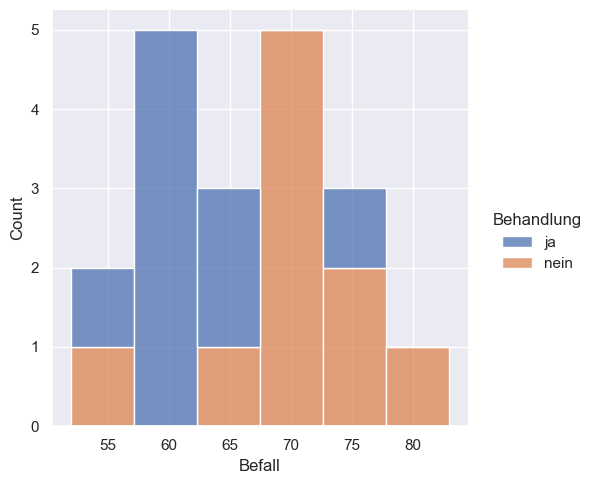

In [78]:
sns.displot(data=df, x='Befall', hue='Behandlung', multiple='stack');

In [79]:
df1.describe()

,Befall
count,9.000000
mean,61.777778
std,6.280481
min,52.000000
25%,59.000000
50%,61.000000
75%,63.000000
max,75.000000


In [80]:
df2.describe()

,Befall
count,10.000000
mean,69.900000
std,7.324995
min,55.000000
25%,69.000000
50%,69.500000
75%,73.750000
max,83.000000


In [81]:
zaehler = 9*7.325**2 + 8*6.281**2
nenner = 17
std_pool = np.sqrt( zaehler / nenner )
std_pool

6.853544866366173

In [82]:
faktor = 10*9 / (10+9)
t = (61.778 - 69.9) / std_pool * np.sqrt(faktor)
t   # Teststatistik

-2.579242516807668

* Wir machen den Test zum Signifikanzniveau $\alpha=0.05$
* Die Zahl der Freiheitsgrade ist 17
* Das benötigte Quantil ist

In [83]:
P = stats.t(17)
P.ppf(0.95)

1.7396067260750672

Es gilt $t < -t_{17,0.95}$, also wird die Nullhypothese abgelehnt

In [84]:
stats.ttest_ind(df1.Befall, df2.Befall, alternative="less")

TtestResult(statistic=-2.5793982980797687, pvalue=0.009746177193200247, df=17.0)


Der p-Wert ist 0.01

* <code>stats.ttest_rel(x,y,alternative)</code> t-Test für verbundene Stichproben (engl: related)
* <code>stats.ttest_ind(x,y,alternative)</code> t-Test für unverbundene Stichproben (engl: independent)
* x, y: Daten
* alternative:  entweder <code>less</code>, <code>greater</code> oder <code>two-sided</code>

# Termine

* 29.01.2025:  Probeklausur, Aufgaben werden vorher auf https://www.math.uni-duesseldorf.de/~internet/bio2425 hochgeladen
* Juli oder August 2025:  1. Klausur zu Mathe für Biologiestudierende
* September 2025:  2. Klausur zu Mathe für Biologiestudierende

Offizielle Klausurtermine auf den Seiten der Biologie https://www.biologie.hhu.de/

<span style='color: red;'>Die Klausur am 20.02.2025 richtet sich ausschließlich an Wiederholer.</span>

